In [1]:
#The path file assumes you have a directory structure with cmdstanpy sitting at the top with subdirectories 
from paths import *

The route directory: direc: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\
Will get code from: codepath: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\code
Will send code to: outpath: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\output
If data is needed it will look in: datapath:  C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\datamerged


In [2]:
import cmdstanpy
from cmdstanpy import CmdStanModel
from stancodes import *  #This file is in the code directory, is in the code directory

In [3]:
#Compile the HB stan code, will only do this once
stan_file = join(codepath,'HBL5.stan')
model = CmdStanModel(stan_file=stan_file)

In [4]:
sys.path.append(datapath)
from bio3loadindata3_socio import *

In [5]:
x = [array(X0_all), array(X1_all), array(X2_all)]
#for i in range(3):
#     x[i][:,1:-1] = x[i][:,1:-1] / 60
#     x[i][:,0] = x[i][:,0] / 5

In [6]:
x[1]

array([[-0.01      ,  0.75      ,  0.75      , ...,  0.25      ,
         0.        ,  0.        ],
       [-1.        ,  0.41666667,  1.        , ...,  0.75      ,
         1.        ,  0.        ],
       [-0.4       ,  0.        ,  0.25      , ...,  1.        ,
         0.41666667,  0.        ],
       ...,
       [-0.05      ,  0.75      ,  0.16666667, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  0.        ,  0.        , ...,  0.        ,
         0.75      ,  0.        ],
       [-1.        ,  0.        ,  0.58333333, ...,  0.        ,
         1.        ,  0.        ]])

In [7]:
Y = y  # already y30 and y30AD concatenated and +1 shifted
ids = id_all  # merged respondent IDs
N = int(max(ids))
T = len(Y)
K = x[0].shape[1]
[N, T, K]

[402, 3216, 7]

In [8]:
frame(x[1])

,0,1,2,3,4,5,6
0,-0.01,0.750000,0.750000,1.000000,0.250000,0.000000,0.0
1,-1.00,0.416667,1.000000,0.416667,0.750000,1.000000,0.0
2,-0.40,0.000000,0.250000,1.000000,1.000000,0.416667,0.0
3,-0.10,0.166667,0.000000,0.250000,1.000000,0.750000,0.0
4,-1.00,0.583333,0.166667,0.750000,0.416667,0.250000,0.0
...,...,...,...,...,...,...,...
3211,-1.00,0.000000,1.000000,0.000000,0.583333,0.000000,0.0
3212,-0.10,0.000000,0.000000,0.250000,0.000000,1.000000,0.0
3213,-0.05,0.750000,0.166667,0.000000,0.000000,0.000000,0.0
3214,-1.00,0.000000,0.000000,0.166667,0.000000,0.750000,0.0


In [9]:
print("ID range:", id_all.min(), "-", id_all.max())

ID range: 1 - 402


In [10]:
ages=socio['age group']
incomes=socio['income']
sizes=socio['household']
gender=socio['gender']
edus=socio['education']
location=socio['borough']


agelist=sorted(list(set(ages)))
incomelist = [
    'less than £15,000',
    '£15,001 - £18,000',
    '£18,001 - £21,000',
    '£21,001 - £25,000',
    '£25,001 - £30,000',
    '£30,001 - £35,000',
    '£35,001 - £40,000',
    '£40,001 - £45,000',
    '£45,001 - £52,000',
    '£52,001 - £60,000',
    '£60,001 - £70,000',
    '£70,001 - £80,000',
    '£80,001 - £100,000',
    'Greater than £100,000',
    'Prefer not to say'
]
sizelist=sorted(list(set(sizes)))

#['18-25', '26-35', '36-45', '46-55', '56-65', '>65', 'Prefer not to say']

age0=(ages==agelist[0]).astype(int)*20
age1=(ages==agelist[1]).astype(int)*30
age2=(ages==agelist[2]).astype(int)*40
age3=(ages==agelist[3]).astype(int)*50
age4=(ages==agelist[4]).astype(int)*60
age5=(ages==agelist[5]).astype(int)*70
age6=(ages==agelist[6]).astype(int)*40

age=age0+age1+age2+age3+age4+age5+age6
age=age/100


#['less than £15,000', '£15,001 - £18,000', '£18,001 - £21,000', '£21,001 - £25,000', '£25,001 - £30,000', '£30,001 - £35,000', '£35,001 - £40,000', '£40,001 - £45,000', '£45,001 - £52,000', '£52,001 - £60,000', '£60,001 - £70,000', '£70,001 - £80,000', '£80,001 - £100,000', 'Greater than £100,000', 'Prefer not to say']

ilist=[12000,16500,19500,23000,27500,32500,37500,42500,48500,56000,65000,75000,90000,110000,37500]

income0=(incomes==incomelist[0]).astype(int)*ilist[0]
income1=(incomes==incomelist[1]).astype(int)*ilist[1]
income2=(incomes==incomelist[2]).astype(int)*ilist[2]
income3=(incomes==incomelist[3]).astype(int)*ilist[3]
income4=(incomes==incomelist[4]).astype(int)*ilist[4]
income5=(incomes==incomelist[5]).astype(int)*ilist[5]
income6=(incomes==incomelist[6]).astype(int)*ilist[6]
income7=(incomes==incomelist[7]).astype(int)*ilist[7]
income8=(incomes==incomelist[8]).astype(int)*ilist[8]
income9=(incomes==incomelist[9]).astype(int)*ilist[9]
income10=(incomes==incomelist[10]).astype(int)*ilist[10]
income11=(incomes==incomelist[11]).astype(int)*ilist[11]
income12=(incomes==incomelist[12]).astype(int)*ilist[12]
income13=(incomes==incomelist[13]).astype(int)*ilist[13]
income14=(incomes==incomelist[14]).astype(int)*ilist[14]

income = income0 + income1 + income2 + income3 + income4 + income5 + income6 + income7 + income8 + income9 + income10 + income11 + income12 + income13 + income14
log_income = np.log(income)

#['1-3', '4-6', '7-9', '10 or more', 'Prefer not to say']

#size0=(sizes==sizelist[0]).astype(int)*30
#size1=(sizes==sizelist[1]).astype(int)*60
#size2=(sizes==sizelist[2]).astype(int)*40
#size3=(sizes==sizelist[3]).astype(int)*50
#size4=(sizes==sizelist[4]).astype(int)*40

#size=size0+size1+size2+size3+size4
#size=size/100

#gender=(socio['gender']=='Female').astype(int)

edu = socio['education'].isin([
    'Tertiary - undergraduate',
    'Tertiary - postgraduate taught e.g. MSc, MA',
    'Tertiary - postgraduate research e.g. MRes, PhD'
]).astype(int)

#location = (socio['borough']=='Manchester').astype(int)

#size= socio['household'].isin([
    #'4-6',
    #'7-9',
    #'10 or more',
    #'Prefer not to say'
#]).astype(int)

demog=cc([age,log_income,edu])
demog=demog-demog.mean()




#frame(age).plot(kind='hist')

#frame(gender).plot(kind='hist',bins=20)
#agelist
#incomelist

In [11]:
# my covariates
X = pd.DataFrame({
    'Age': age,
    'Log_Income': log_income,
    'Edu_Tertiary': edu
})

In [12]:
corr_matrix = X.corr()
print(corr_matrix)

                   Age  Log_Income  Edu_Tertiary
Age           1.000000   -0.050957     -0.193828
Log_Income   -0.050957    1.000000      0.229179
Edu_Tertiary -0.193828    0.229179      1.000000


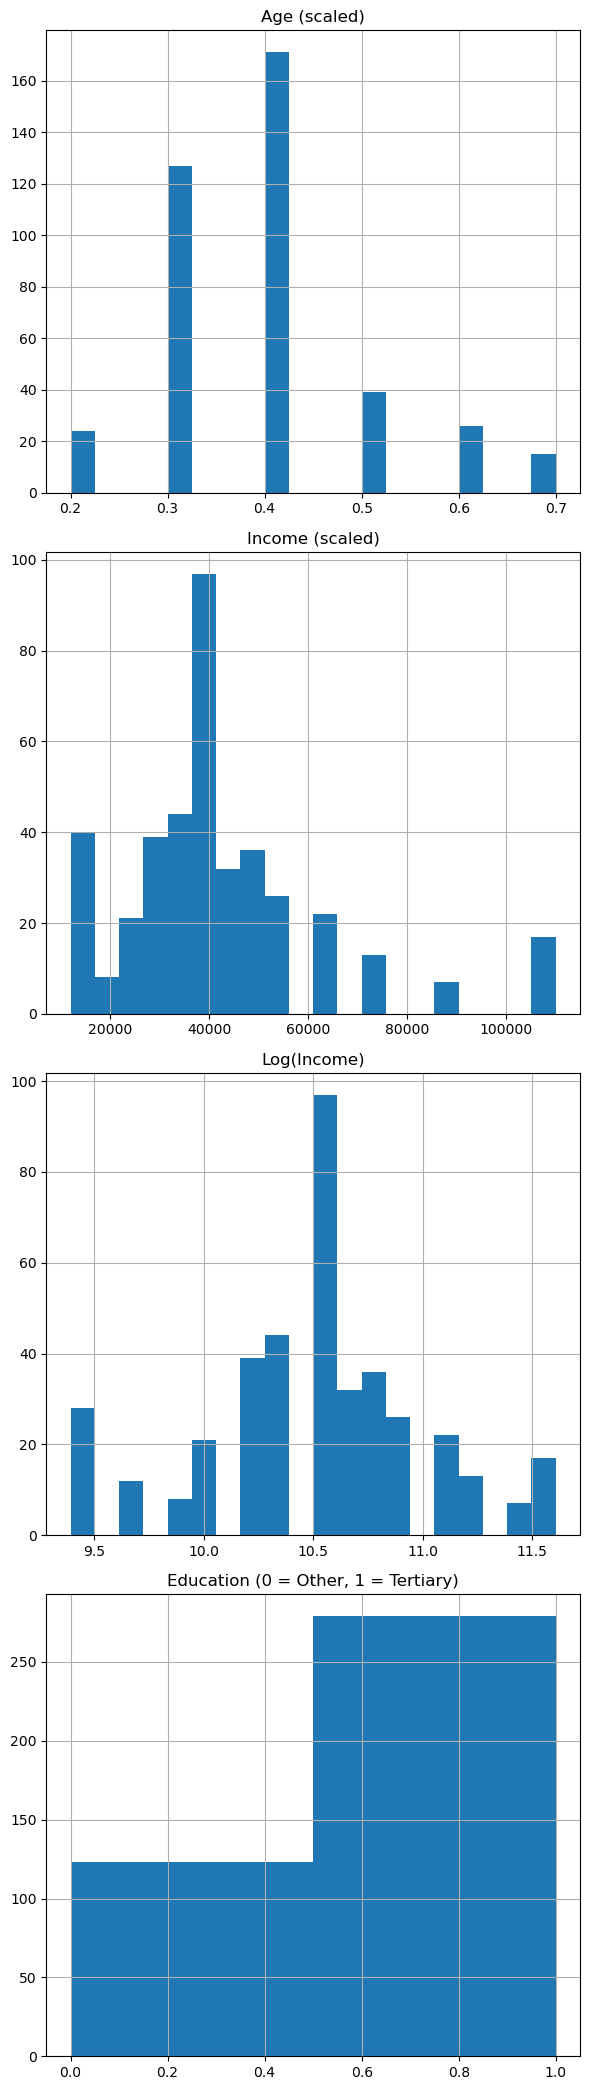

In [13]:
import matplotlib.pyplot as plt
from pandas import DataFrame as frame

fig, ax = plt.subplots(4, figsize=(6, 21))  # 4 plots now

# Age
frame(age).hist(ax=ax[0], bins=20)
ax[0].set_title("Age (scaled)")

# Income (scaled)
frame(income).hist(ax=ax[1], bins=20)
ax[1].set_title("Income (scaled)")

# Log Income
frame(log_income).hist(ax=ax[2], bins=20)
ax[2].set_title("Log(Income)")

# Household size
#frame(size).hist(ax=ax[3], bins=2)
#ax[3].set_title("Household Size (0 = 1-3, 1 = 4 and greater)")

# Gender
#frame(gender).hist(ax=ax[4], bins=2)
#ax[4].set_title("Gender (0 = Male, 1 = Female)")

# Education
frame(edu).hist(ax=ax[3], bins=2)
ax[3].set_title("Education (0 = Other, 1 = Tertiary)")

# Borough location
#frame(location).hist(ax=ax[6], bins=2)
#ax[6].set_title("Borough (0 = Other, 1 = Manchester)")

plt.tight_layout()
plt.show()

In [14]:
# Check which categories were mapped to which numeric values
#print(pd.DataFrame({'Original': sizes, 'Mapped': size}).drop_duplicates())

In [15]:
print(pd.DataFrame({'Original': edus, 'Mapped': edu}).drop_duplicates())

                                            Original  Mapped
0    Tertiary - postgraduate research e.g. MRes, PhD       1
1                                          Secondary       0
2        Tertiary - postgraduate taught e.g. MSc, MA       1
3                                  Prefer not to say       0
4                           Tertiary - undergraduate       1
9                                            Primary       0
15                     Non-vocational qualifications       0
18                                             Other       0
138                              No formal education       0


In [16]:
pd.DataFrame({'Original': incomes, 'Mapped': income}).drop_duplicates()

,Original,Mapped
0,"£30,001 - £35,000",32500
1,"less than £15,000",12000
2,"£35,001 - £40,000",37500
3,"£45,001 - £52,000",48500
9,Prefer not to say,37500
10,"£70,001 - £80,000",75000
11,"£52,001 - £60,000",56000
15,"£25,001 - £30,000",27500
22,"£40,001 - £45,000",42500
23,"£60,001 - £70,000",65000


In [17]:
pd.DataFrame({'Original': ages, 'Mapped': age}).drop_duplicates()

,Original,Mapped
0,36-45,0.4
1,26-35,0.3
2,46-55,0.5
9,Prefer not to say,0.4
10,>65,0.7
21,18-25,0.2
22,56-65,0.6


In [18]:
from shortercuts import rc
y=squeeze(array(findex(rc([y30+1,y30AD+1]))))
card=squeeze(array(findex(rc([card30,card30AD]))))
ids=squeeze(array(findex(rc([id30,id30AD]))))
X0=array(findex(rc([X0_30,X0_30AD])))
X1=array(findex(rc([X1_30,X1_30AD])))
X2=array(findex(rc([X2_30,X2_30AD])))
x=[X0,X1,X2]
Z=array(demog)
J=demog.shape[1]

In [19]:
beta_mean=[0,0,0,0,0]    #prior mean for the wtp parameters
alpha_mean=0                 #prior mean for the scale parameters : note that this is the log or the scale
theta_mean=0                 #prior mean for the opt-out parameters

s=.3
beta_sigma=[s,s,s,s,s]     #prior std for the mean of beta   -wtps
alpha_sigma=1              #prior std for the mean if alpha -scale
theta_sigma=s              #prior std for the mean of theta -opt out

t=0.05
a=[1,1,1,1,1]              #These are gammma priors for the heterogeneous WTPs: 
b=[t,t,t,t,t]       #These are gammma priors for the heterogeneous WTPs: note that mean=a/b and var =a/b**2
a_alpha=1; b_alpha=t;         #These are gammma priors for the heterogeneous scale parameter
a_theta=1; b_theta=t;         #These are gammma priors for the heterogeneous opt out parameters

hdata = {'M': 3, 'N': N, 'K':K, 'T': rows(Y) , 'y': Y, 'ids': ids, 'x':x, 'J':J, 'Z':Z,
         'beta_mean':beta_mean,'beta_sigma':beta_sigma,
         'alpha_mean':alpha_mean,'alpha_sigma':alpha_sigma,
         'theta_mean':theta_mean,'theta_sigma':theta_sigma,
         'a':a,'b':b,'a_alpha':a_alpha,'b_alpha':b_alpha,'a_theta':a_theta,'b_theta':b_theta, 
         'lower_precision_beta_ivar':  1, #The larger these are the greater the hommogeneity enforced
         'lower_precision_alpha_ivar': 1, #The larger these are the greater the hommogeneity enforced
         'lower_precision_theta_ivar': 1, #The larger these are the greater the hommogeneity enforced
         'lower_beta_bound':-1,           #If the parameters exceed this then this attributes wtp exceeds the largest payment
         'upper_beta_bound': 1,
         'lower_theta_bound':-1,
         'upper_theta_bound':1}

In [20]:
#Out of interest get the maximum likelihood estimates of beta_mu
import time
start=time.time()
mle = model.optimize(data=hdata)
q=mle.stan_variables()
end=time.time()
print('time taken in mins', (end-start)/60,'seconds', end-start)
#q['beta']

20:53:24 - cmdstanpy - INFO - Chain [1] start processing
20:53:34 - cmdstanpy - INFO - Chain [1] done processing
20:53:34 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
20:53:34 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
20:53:34 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
20:53:34 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
20:53:34 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
20

time taken in mins 0.17185437281926472 seconds 10.311262369155884


In [21]:
#Here we are going to use pathfinder to get some starting points
from cmdstanpy.model import cmdstan_path
pathfinder = model.pathfinder(data=hdata)

20:53:34 - cmdstanpy - INFO - Chain [1] start processing
20:59:20 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
#We are going to run 6 chains
chains=6
pathfinder_inits = pathfinder.create_inits(chains=chains)

In [23]:
#Lets fit the model using the intitialiser from pathfinder
'''
A reminder of all the possible settings
sample(data=None, chains=None, parallel_chains=None, threads_per_chain=None, seed=None, chain_ids=None, inits=None, 
iter_warmup=None, iter_sampling=None, save_warmup=False, thin=None, max_treedepth=None, metric=None, 
step_size=None, adapt_engaged=True, adapt_delta=None, adapt_init_phase=None, adapt_metric_window=None, 
adapt_step_size=None, fixed_param=False, output_dir=None, sig_figs=None, save_latent_dynamics=False, 
save_profile=False, show_progress=True, show_console=False, refresh=None, time_fmt='%Y%m%d%H%M%S', 
timeout=None, *, force_one_process_per_chain=None)
'''
chains=6
start=time.time()
fit=model.sample(data=hdata, chains=chains,iter_warmup=1000, inits=pathfinder_inits,
                 iter_sampling=2000, show_progress=True,output_dir=None,thin=1,adapt_delta=.8,max_treedepth=14)
end=time.time()
print('time taken in mins', (end-start)/60,'seconds', end-start)

21:00:27 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

22:13:21 - cmdstanpy - INFO - CmdStan done processing.
22:13:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'HBL5.stan', line 97, column 0 to column 36)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'HBL5.stan', line 97, column 0 to column 36)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'HBL5.stan', line 97, column 0 to column 36)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'HBL5.stan', line 97, column 0 to column 36)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'HBL5.stan', line 97, column 0 to column 36)
Consider re-running with show_console=True if the above output is unclear!



time taken in mins 73.41935521364212 seconds 4405.161312818527


In [24]:
#fit.summary()

In [25]:
z=fit.stan_variables()

In [26]:
outpath='C:\\Users\\n_1ho\\Documents\\biodiversity_model_final_kelvin\\cmdstanpy\\output'  #if you want to change the output
savemodel(z,join(outpath,'z_niko30_30AD_rescaled_priorbeta_theta_lb_ub_socio_age_inc_tert_20251019'))

In [27]:
outpath='C:\\Users\\n_1ho\\Documents\\biodiversity_model_final_kelvin\\cmdstanpy\\output'  #if the outpath was change
z=loadmodel(join(outpath,'z_niko30_30AD_rescaled_priorbeta_theta_lb_ub_socio_age_inc_tert_20251019'))


<Axes: title={'center': 'Opt Out ASC'}>

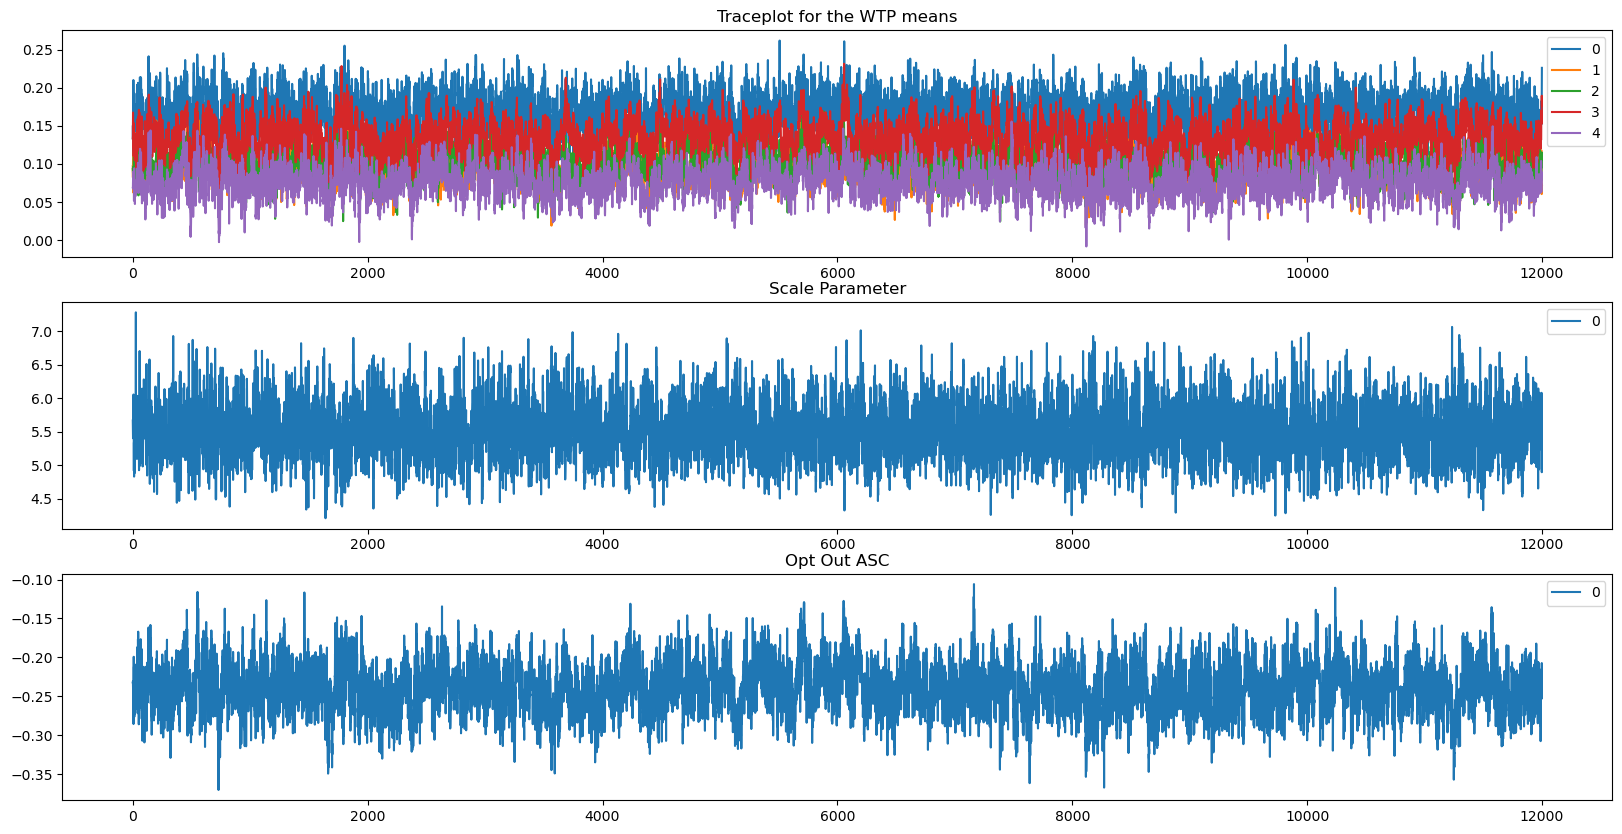

In [28]:
from shortercuts import pltsize
pltsize(10,20)
fig,ax=plt.subplots(3)
frame(z['beta_mu']).plot(title='Traceplot for the WTP means',ax=ax[0])
frame(exp(z['alpha_mu'])).plot(ax=ax[1],title='Scale Parameter')
frame(z['theta_mu']).plot(ax=ax[2],title='Opt Out ASC')

In [29]:
#print(fit.diagnose())

In [30]:
print(z.keys())

dict_keys(['beta', 'beta_mu', 'beta_ivar', 'alpha', 'alpha_mu', 'alpha_ivar', 'theta', 'theta_mu', 'theta_ivar', 'demog_beta_coeffs', 'demog_theta_coeffs', 'mu', 'coef', 'beta_std', 'alpha_std', 'theta_std', 'beta_mu_ind', 'theta_mu_ind', 'log_lik'])


In [31]:
beta_mu=(5/60)*100*frame(z['beta_mu'])
theta_mu= 5*100*frame(z['theta_mu'])
beta_mu.columns=['bees','sparrow','butterflies','hedgehogs','bats']
varnames=beta_mu.columns

cc([beta_mu.describe(),theta_mu.describe()]).round(2)


,bees,sparrow,butterflies,hedgehogs,bats,0
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,1.40,0.78,0.84,1.13,0.64,-119.83
std,0.21,0.16,0.17,0.17,0.17,16.01
min,0.57,0.16,0.20,0.37,-0.07,-185.21
25%,1.27,0.67,0.73,1.01,0.52,-130.60
50%,1.40,0.78,0.84,1.12,0.63,-119.96
75%,1.54,0.88,0.95,1.24,0.75,-109.34
max,2.18,1.40,1.50,1.93,1.30,-52.90


In [32]:
beta_mu= 5*100*frame(z['beta_mu'])
theta_mu= 5*100*frame(z['theta_mu'])
beta_mu.columns=['bees','sparrow','butterflies','hedgehogs','bats']
varnames=beta_mu.columns

cc([beta_mu.describe(),theta_mu.describe()]).round(2)

,bees,sparrow,butterflies,hedgehogs,bats,0
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,84.18,46.68,50.32,67.54,38.16,-119.83
std,12.33,9.30,10.25,10.47,10.16,16.01
min,34.36,9.47,12.19,22.22,-4.20,-185.21
25%,75.91,40.41,43.54,60.37,31.33,-130.60
50%,84.15,46.72,50.39,67.35,37.89,-119.96
75%,92.44,52.82,57.26,74.52,44.83,-109.34
max,130.99,83.72,90.08,115.74,77.82,-52.90


In [33]:
# 95% credible intervals (2.5% and 97.5%)
beta_ci = beta_mu.quantile([0.025, 0.975]).T
theta_ci = theta_mu.quantile([0.025, 0.975]).T

# Optional: rename columns for clarity
beta_ci.columns = ['2.5%', '97.5%']
theta_ci.columns = ['2.5%', '97.5%']

# Round and display
print("Credible Intervals for beta_mu:")
print(beta_ci.round(2))
print("\nCredible Intervals for theta_mu:")
print(theta_ci.round(2))

Credible Intervals for beta_mu:
              2.5%   97.5%
bees         60.13  108.58
sparrow      28.36   64.83
butterflies  29.96   70.33
hedgehogs    47.54   88.23
bats         18.61   58.37

Credible Intervals for theta_mu:
     2.5%  97.5%
0 -150.98 -88.08


<Axes: title={'center': 'WTP  to avoid SQ'}, ylabel='Frequency'>

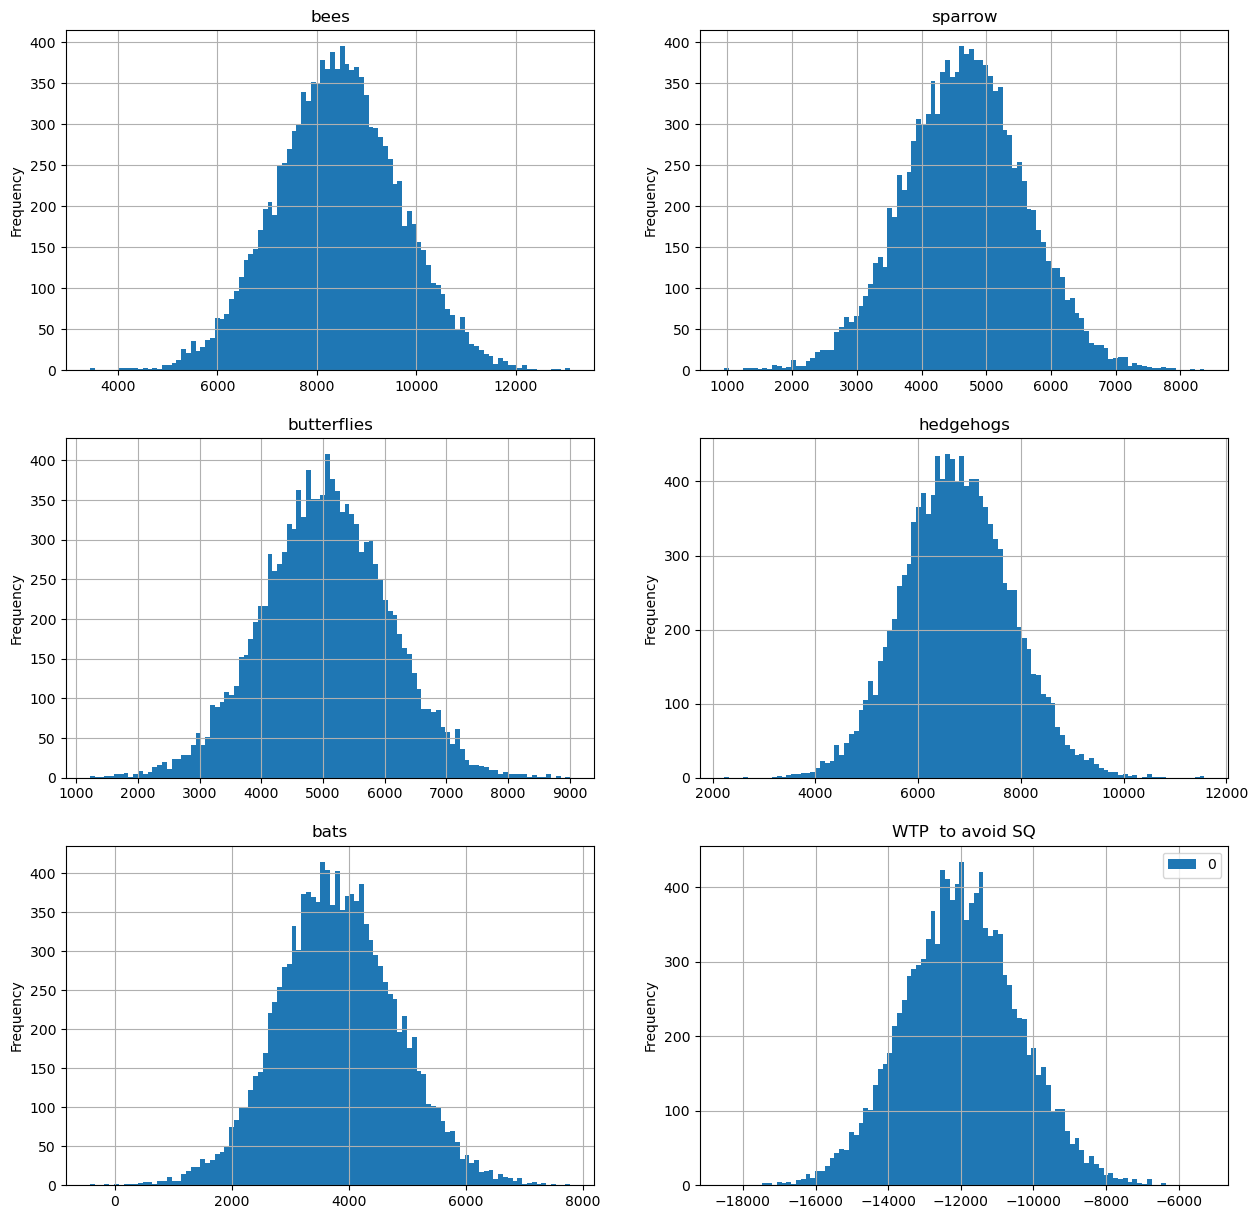

In [34]:
pltsize(15,15)
fig,ax=plt.subplots(3,2)
scale=100
(scale*beta_mu[varnames[0]]).plot(kind='hist',bins=100,ax=ax[0,0],title=varnames[0],grid=True)
(scale*beta_mu[varnames[1]]).plot(kind='hist',bins=100,ax=ax[0,1],title=varnames[1],grid=True)

(scale*beta_mu[varnames[2]]).plot(kind='hist',bins=100,ax=ax[1,0],title=varnames[2],grid=True)
(scale*beta_mu[varnames[3]]).plot(kind='hist',bins=100,ax=ax[1,1],title=varnames[3],grid=True)
(scale*beta_mu[varnames[4]]).plot(kind='hist',bins=100,ax=ax[2,0],title=varnames[4],grid=True)
(scale*theta_mu).plot(kind='hist',grid=True,bins=100,ax=ax[2,1],title='WTP  to avoid SQ')


In [35]:
import arviz as az
idata = az.from_cmdstanpy(posterior=fit)
az.summary(idata, var_names=["demog_beta_coeffs"], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"demog_beta_coeffs[0, 0]",-0.01,0.22,-0.42,0.41,0.01,0.0,1957.36,3993.20,1.00
"demog_beta_coeffs[0, 1]",-0.28,0.17,-0.61,0.03,0.01,0.0,1013.88,2898.46,1.01
"demog_beta_coeffs[0, 2]",-0.09,0.18,-0.45,0.23,0.01,0.0,1073.02,2318.72,1.01
"demog_beta_coeffs[0, 3]",0.02,0.18,-0.31,0.36,0.01,0.0,931.83,2664.93,1.01
"demog_beta_coeffs[0, 4]",0.17,0.18,-0.17,0.52,0.01,0.0,958.65,2589.53,1.01
"demog_beta_coeffs[1, 0]",-0.02,0.05,-0.11,0.07,0.00,0.0,2047.44,4483.37,1.00
"demog_beta_coeffs[1, 1]",-0.00,0.04,-0.07,0.07,0.00,0.0,1147.38,1877.47,1.00
"demog_beta_coeffs[1, 2]",0.02,0.04,-0.06,0.09,0.00,0.0,1003.28,2588.93,1.01
"demog_beta_coeffs[1, 3]",-0.02,0.04,-0.10,0.06,0.00,0.0,1088.67,2436.68,1.00
"demog_beta_coeffs[1, 4]",-0.03,0.04,-0.11,0.04,0.00,0.0,946.84,2084.43,1.00


In [36]:
# Verify the dimensional structure
idata.posterior["demog_beta_coeffs"].shape

(6, 2000, 3, 5)

In [37]:
# Define readable names
socio_vars = ["Age", "Log income","Edu tertiary"]
attr_names = ["Bumblebees", "Sparrows", "Butterfiles", "Hedgehogs", "Bats"]

# Extract summary table
summary = az.summary(idata, var_names=["demog_beta_coeffs"], round_to=2)

# Add labels
summary["Socio_var"] = [socio_vars[i // len(attr_names)] for i in range(len(summary))]
summary["Attribute"] = [attr_names[i % len(attr_names)] for i in range(len(summary))]

# Clean table
summary = summary[["Socio_var", "Attribute", "mean", "sd", "hdi_3%", "hdi_97%"]]
summary.columns = ["Socio variable", "Attribute", "Mean", "SD", "2.5%", "97.5%"]

print(summary)

                        Socio variable    Attribute  Mean    SD  2.5%  97.5%
demog_beta_coeffs[0, 0]            Age   Bumblebees -0.01  0.22 -0.42   0.41
demog_beta_coeffs[0, 1]            Age     Sparrows -0.28  0.17 -0.61   0.03
demog_beta_coeffs[0, 2]            Age  Butterfiles -0.09  0.18 -0.45   0.23
demog_beta_coeffs[0, 3]            Age    Hedgehogs  0.02  0.18 -0.31   0.36
demog_beta_coeffs[0, 4]            Age         Bats  0.17  0.18 -0.17   0.52
demog_beta_coeffs[1, 0]     Log income   Bumblebees -0.02  0.05 -0.11   0.07
demog_beta_coeffs[1, 1]     Log income     Sparrows -0.00  0.04 -0.07   0.07
demog_beta_coeffs[1, 2]     Log income  Butterfiles  0.02  0.04 -0.06   0.09
demog_beta_coeffs[1, 3]     Log income    Hedgehogs -0.02  0.04 -0.10   0.06
demog_beta_coeffs[1, 4]     Log income         Bats -0.03  0.04 -0.11   0.04
demog_beta_coeffs[2, 0]   Edu tertiary   Bumblebees  0.10  0.06 -0.01   0.20
demog_beta_coeffs[2, 1]   Edu tertiary     Sparrows -0.01  0.04 -0.08   0.07

In [38]:
#If you want the rhat values for beta_my which is a two dimensional array, 
r_hat2(z,'beta_mu',chains)

(12000, 5)


[['beta_mu', 1, 1.002720923825391],
 ['beta_mu', 2, 1.006142143970322],
 ['beta_mu', 3, 1.0081253651712874],
 ['beta_mu', 4, 1.0093125838052024],
 ['beta_mu', 5, 1.0044334757159707]]

In [39]:
r_hat1(z,'alpha_mu',chains)

(12000,)


['alpha_mu', 1.0010932642027002]

In [40]:
w=WAICf(z['log_lik']) 
#Look at the WAIC, note that my WAIC (produced here) gives the same results canned software for simple models
#However, I have had some divergences for some more complex models, though I am not sure why

In [41]:
#print WAIC
print(f"WAIC: {w}")

WAIC: (         waic        elpd     p_waic1     p_waic2    maxloglik    se_waic
0  4486.67264 -2243.33632  461.349421  579.081885 -1741.222194  68.456752, array([[-1.13365029],
       [-0.90469077],
       [-1.21887827],
       ...,
       [-1.69153096],
       [-0.71232562],
       [-0.58576935]]))


In [42]:
#import arviz as az

#  pointwise log-likelihood saved in fit
loo_result = az.loo(fit)
print(loo_result)

Computed from 12000 posterior samples and 3216 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -2333.99    36.60
p_loo      669.74        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     2902   90.2%
   (0.70, 1]   (bad)       313    9.7%
   (1, Inf)   (very bad)    1    0.0%



In [43]:
waic_result = az.waic(fit)
print(waic_result)


Computed from 12000 posterior samples and 3216 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -2243.29    34.23
p_waic      579.03        -

There has been a warning during the calculation. Please check the results.


In [44]:
betas=[]
for k in range(shape(z['beta'])[2]):
    beta1=[]
    for i in range(shape(z['beta'])[1]):
        beta1+=[float(z['beta'][:,i,k].mean())]
    betas+=[beta1]
betas=(500/60)*frame(betas) .T
betas.columns=beta_mu.columns
#betas

<Axes: ylabel='Frequency'>

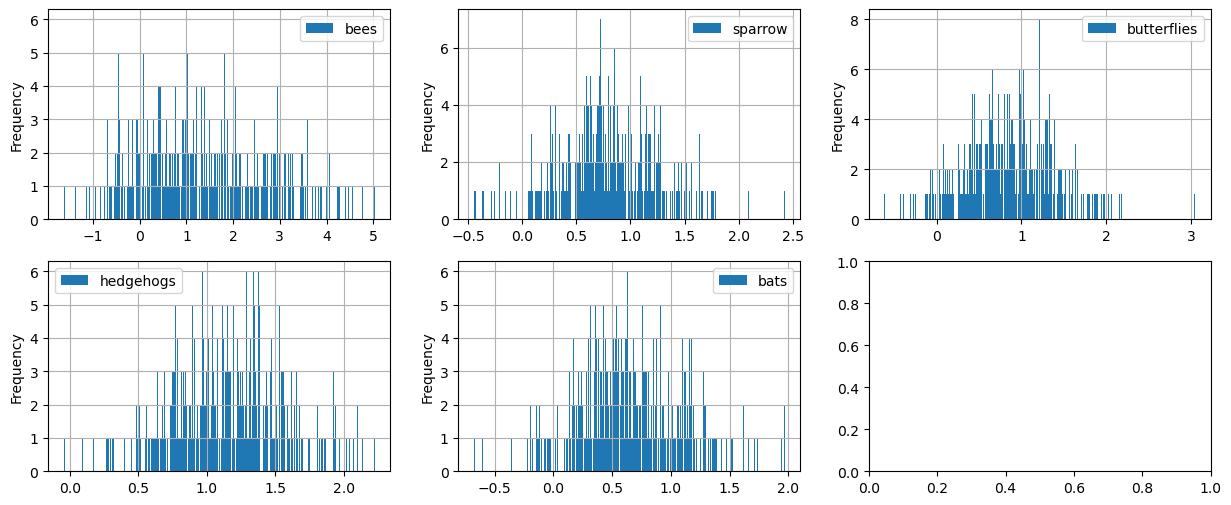

In [45]:
pltsize(6,15)
fig,ax=plt.subplots(2,3)
['bees','sparrow','butterflies','hedgehogs','bats']
betas.plot(kind='hist',y='bees',bins=383,ax=ax[0,0],grid=True)
betas.plot(kind='hist',y='sparrow',bins=383,ax=ax[0,1],grid=True)
betas.plot(kind='hist',y='butterflies',bins=383,ax=ax[0,2],grid=True)
betas.plot(kind='hist',y='hedgehogs',bins=383,ax=ax[1,0],grid=True)
betas.plot(kind='hist',y='bats',bins=383,ax=ax[1,1],grid=True)


In [46]:
exp(1)

2.718281828459045

In [47]:
exp(1+1/2)

4.4816890703380645

In [48]:
x[0]

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [49]:
x[2]

array([[-0.05      ,  0.16666667,  0.41666667, ...,  1.        ,
         0.75      ,  0.        ],
       [-1.        ,  0.        ,  0.41666667, ...,  0.25      ,
         0.25      ,  0.        ],
       [-1.        ,  1.        ,  0.75      , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.4       ,  0.        ,  0.        , ...,  0.58333333,
         0.        ,  0.        ],
       [-0.6       ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.4       ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [50]:
print(z['beta_mu'].shape)

(12000, 5)


In [51]:
print(100 * beta_mu.describe())

               bees       sparrow   butterflies     hedgehogs          bats
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06
mean   8.418273e+03  4.667526e+03  5.032358e+03  6.754219e+03  3.816220e+03
std    1.233099e+03  9.302995e+02  1.025012e+03  1.047064e+03  1.015855e+03
min    3.435845e+03  9.465100e+02  1.219390e+03  2.222365e+03 -4.201765e+02
25%    7.590562e+03  4.040753e+03  4.354059e+03  6.036950e+03  3.133420e+03
50%    8.414775e+03  4.671892e+03  5.039050e+03  6.734525e+03  3.789458e+03
75%    9.244012e+03  5.282262e+03  5.726025e+03  7.451950e+03  4.483099e+03
max    1.309885e+04  8.371700e+03  9.008300e+03  1.157370e+04  7.781950e+03


In [52]:
print(100 * theta_mu.describe())


                  0
count  1.200000e+06
mean  -1.198278e+04
std    1.600660e+03
min   -1.852090e+04
25%   -1.305955e+04
50%   -1.199570e+04
75%   -1.093395e+04
max   -5.290400e+03


In [53]:
print(z['beta_mu'].shape)
print(frame(z['beta_mu']).shape)
print(beta_mu.shape)

(12000, 5)
(12000, 5)
(12000, 5)


In [54]:
print(frame(z['beta_mu']).head())

          0         1         2         3         4
0  0.149204  0.097058  0.093323  0.133845  0.069132
1  0.131877  0.082203  0.089920  0.136478  0.069851
2  0.157830  0.105021  0.087814  0.167475  0.080844
3  0.145952  0.078327  0.095875  0.134662  0.086788
4  0.110884  0.074954  0.088685  0.151479  0.089823


In [55]:
print(len(y30), len(y30AD))

1608 1608


In [56]:
print("df1 attribute ranges:")
print(df1.round(3))

print("df2 attribute ranges:")
print(df2.round(3))

df1 attribute ranges:
bees1           60.0
sparrows1       60.0
butterflies1    60.0
hedgehogs1      60.0
bats1           60.0
tax1             1.0
dtype: float64
df2 attribute ranges:
bees2           60.0
sparrows2       60.0
butterflies2    60.0
hedgehogs2      60.0
bats2           60.0
tax2             1.0
dtype: float64


In [57]:
df1.index = ['bees', 'sparrows', 'butterflies', 'hedgehogs', 'bats', 'tax']
df2.index = ['bees', 'sparrows', 'butterflies', 'hedgehogs', 'bats', 'tax']
ratio = df2 / df1
print(ratio)

bees           1.0
sparrows       1.0
butterflies    1.0
hedgehogs      1.0
bats           1.0
tax            1.0
dtype: float64


In [58]:
# Preview first 10 respondent IDs in your choice data
print("Sample IDs from id_all:", id_all[:32])

# Now, get the corresponding sociodemographics from `socio`
print("Corresponding sociodemographics:")
print(socio.loc[id_all[:32]-1])  # -1 because pandas is 0-indexed

Sample IDs from id_all: [1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4]
Corresponding sociodemographics:
   ID map used  difficulty     borough                             ward  \
0   1    green         3.0  Manchester                    Whalley Range   
0   1    green         3.0  Manchester                    Whalley Range   
0   1    green         3.0  Manchester                    Whalley Range   
0   1    green         3.0  Manchester                    Whalley Range   
0   1    green         3.0  Manchester                    Whalley Range   
0   1    green         3.0  Manchester                    Whalley Range   
0   1    green         3.0  Manchester                    Whalley Range   
0   1    green         3.0  Manchester                    Whalley Range   
1   2   purple         7.0  Manchester  Miles Platting and Newton Heath   
1   2   purple         7.0  Manchester  Miles Platting and Newton Heath   
1   2   purple         7.0  Manchester  Miles Platti

In [59]:
print("id_all min:", id_all.min(), "max:", id_all.max())
print("socio shape:", socio.shape)

# Check for out-of-bounds
bad_ids = [i for i in id_all if i < 1 or i > len(socio)]
print("Out-of-range IDs:", bad_ids)

id_all min: 1 max: 402
socio shape: (402, 19)
Out-of-range IDs: []


In [60]:
test_id = 250
print("Choices for ID", test_id, "appear at rows:")
print(np.where(id_all == test_id)[0])  # shows all row indices where this ID appears

print("\nSociodemographics for ID", test_id)
print(socio.loc[test_id - 1])  # again, -1 because zero-indexed


Choices for ID 250 appear at rows:
[1992 1993 1994 1995 1996 1997 1998 1999]

Sociodemographics for ID 250
ID                                                              250
map used                                                       blue
difficulty                                                      1.0
borough                                                  Manchester
ward                                                         Kersal
post code                                                    M7 5TP
gender                                                         Male
age group                                                     56-65
household                                                       4-6
education               Tertiary - postgraduate taught e.g. MSc, MA
occupation                                                 Employed
income                                            £35,001 - £40,000
time and cost                                     Somewhat disagree
time and 

In [61]:
target_id = 250
positions = np.where(id_all == target_id)[0]
print("Choice rows for ID", target_id, ":", positions)

print("\nChoices made:")
for pos in positions:
    print(f"y[{pos}] = {y[pos]}")

print("\nSociodemographics:")
print(socio.loc[target_id - 1])  # -1 because pandas is 0-based

Choice rows for ID 250 : [1992 1993 1994 1995 1996 1997 1998 1999]

Choices made:
y[1992] = 1
y[1993] = 1
y[1994] = 2
y[1995] = 1
y[1996] = 2
y[1997] = 1
y[1998] = 1
y[1999] = 1

Sociodemographics:
ID                                                              250
map used                                                       blue
difficulty                                                      1.0
borough                                                  Manchester
ward                                                         Kersal
post code                                                    M7 5TP
gender                                                         Male
age group                                                     56-65
household                                                       4-6
education               Tertiary - postgraduate taught e.g. MSc, MA
occupation                                                 Employed
income                                            £35,